# Polynomial Interpolation

In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Interpolation with the Vandermonde matrix

Given $d+1$ data points $(x_0,y_0), \dots , (x_d,y_d)$ there exists a unique polynomial of degree $d$

$$
p(t) = c_0 + c_1 x + \cdots + c_d x^d
$$

such that $p(x_k) = y_k$ for each $k=0,\dots,d$. The coefficients $c_k$ are unknown and each data point gives us an equation of the form $\sum_{i=0}^{d} c_i x_{k}^{i} = y_k$, pour $k=0,\dotsc,d$. This gives a linear system of the form

$$(S):~~~\left\{
\begin{align*}
c_0 + c_1x_1 + \cdots + c_d x_1^d &= y_1 \\
c_0 + c_1x_2 + \cdots + c_d x_2^d &= y_2 \\
& \vdots \\
c_0 + c_1x_d + \cdots + c_d x_d^d &= y_d
\end{align*}
\right.
$$

which can be recast as $A \boldsymbol{c} = \boldsymbol{y}$

$$
\underbrace{\begin{bmatrix}
1 & x_1 & \cdots & x_1^d \\
1 & x_2 & \cdots & x_2^d \\
\vdots & \vdots & \ddots & \vdots \\
 1 & x_d & \cdots & x_d^d
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_d \end{bmatrix}}_{\boldsymbol{c}}
=
\underbrace{\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}}_{\boldsymbol{y}}
$$

The matrix $A$ is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

## Example 

Consider the three points $(-1,1),(0,0),(1,1)$. One easily checks that $p(t) = t^2$ is the unique polynomial which interpolates these points. Let's create the matrix A using [`numpy.vander`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) and solve the system (S) using [`scipy.linalg.solve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html).

In [88]:
#Data points
x = np.array([-1,0,1])
y = np.array([1,0,1])
# Vandermonde matrix
A = np.vander(x,increasing=True)
print('A=\n',A)
#solution of the system
c = la.solve(A,y)
print('c = ', c)

A=
 [[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]]
c =  [0. 0. 1.]


The solution corresponds to the coefficients $c_0=0$, $c_1=0$ and $c_2=1$. That is $p(t) = t^2$.

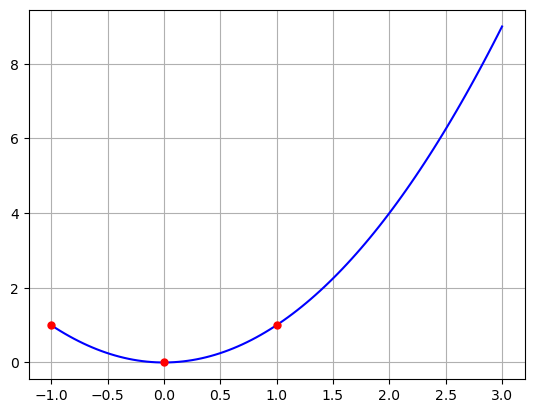

In [89]:
#plot
X = np.linspace(-1,3,100)
Y = c[0] + c[1]*X + c[2]*X**2 
plt.plot(X,Y,'b-',x,y,'r.',markersize=10)
plt.grid(True)
plt.show()

> **Exercice 1:** Solve the system (S) with data points $(0,0),(1,1),(2,0),(3,0)$.

In [90]:
# Insert your code here:

Interpolation using the Vandermon matrix is not used in practice

> The system (S) is expensive to solve for a large number of data points increase.

> The matrix $A$ has a large condition number $\kappa(A) = \frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}$ (if the data changes slighly results change !)

> **Exercice:**

Plot the condition number (use `np.linalg.cond`) of $A$ as $N$ increases when $x_k = \frac{k}{N}$, $k=0,\dots,N$. What do you observe ?

In [91]:
# Insert your code here:

> **Exercice:**

Interpolate the points $\left(x_k = \frac{k}{N},\sin(\pi x_k)\right)$ for $N=16$. Add some noise to the data. What do you observe ?

In [92]:
# Insert your code here:

# Lagrange polynomial interpolation

Compated to the interpolation using the Vandermond matrix, Lagrange interpolation does not require to solve a linear system. In addition, it allows adding data points easily. Again, pick $d+1$ data points $(x_0,y_0), \dots , (x_d,y_d)$. We are looking again for a polynpmial $p$ such that $p(x_k) = y_k$, for $k=0,\dotsc,d$. 

We write polynomial $p$ as a combination of the Lagrange basis polynomials $(L_i)_{i=0,\dotsc,d}$ where
$$
L_{i}(x) = \Pi_{j=0,j\neq i}^{d} \frac{x-x_j}{x_i-x_j}
$$
and
$$
p(x) = \sum_{i=0}^{d} y_i L_{i}(x).
$$

> *Example*

 Consider the following data points: $(0,1), (1,3),(2,2)$. One can easily plot the polynomials $L_0, L_1, L_2$. Indeed:
 $$
 L_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_3)} = \frac{1}{2}(2-3x+x^2).
 $$
 Similarly 
 $$
 L_1(x) = 2x-x^2 ~~\mbox{and}~~L_2(x) = \frac{1}{2}(-x+x^2).
 $$ 
 To plot polynomials we make use of the `numpy.polynomial` package.

In [93]:
import numpy.polynomial.polynomial as poly

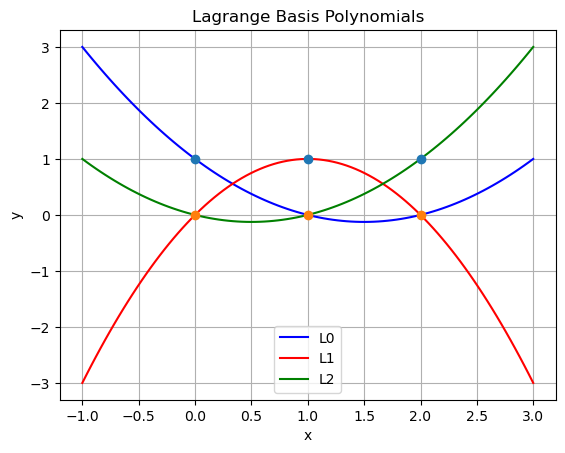

In [94]:
x = [0, 1, 2]
y = [1, 3, 2]
# The coefficients of the polynomials
L0_coeff = [1, -1.5, .5]
L1_coeff = [0, 2, -1]
L2_coeff = [0, -.5,.5]

#Get the polynomial functions
L0 = poly.Polynomial(L0_coeff)
L1 = poly.Polynomial(L1_coeff)
L2 = poly.Polynomial(L2_coeff)

#plot
X = np.linspace(-1,3,100)
plt.plot(X,L0(X),'b-',label = "L0")
plt.plot(X,L1(X),'r-',label = "L1")
plt.plot(X,L2(X),'g-',label = "L2")
plt.plot(x, np.ones(len(x)), "o", x,np.zeros(len(x)), "o")
plt.title("Lagrange Basis Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

> **Exercice:**

Compute and plot the Lagrange polynomial $p$. Verify that $p(x_k) = y_k$ for $k=0,1,2$. 

In [ ]:
# Insert your code here:

Instead of computing the Lagrange polynomial "by hand", it is convenient to use the `lagrange`function in `SciPy`.

In [95]:
from scipy.interpolate import lagrange

In [96]:
L = lagrange(x,y)

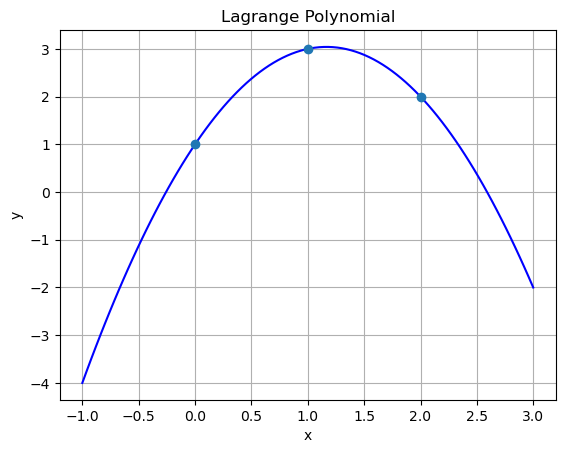

In [97]:
plt.plot(X,L(X),'b-')
plt.plot(x,y,'o')
plt.title("Lagrange Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

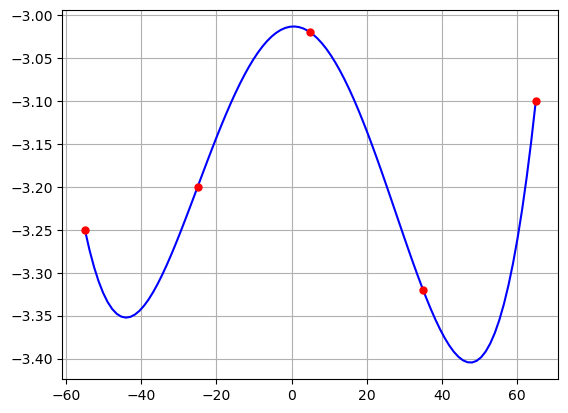

In [127]:
x = [-55, -25, 5, 35, 65]
yy = [-3.25, -3.2, -3.02, -3.32, -3.1]
#t = np.linspace(0,1,N+1)
#yy = np.sin(np.pi*t)
X = np.linspace(min(x), max(x), 100)
Y = lagrange(x,yy)
plt.plot(X,Y(X),'b-',x,yy,'r.',markersize=10)
plt.grid()
plt.show()


> **Exercice 3:**
Write a function `lagrange_interpolation(x,y,X)` that computes the Lagrange interpolation of the data points `x` and `y` contained in `X`.
You can use a *nested for-loop*: the inner
for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the
sum for the Lagrange polynomial.

In [142]:
## Complete this code here:
def lagrange_interpolation(x, y, X):
    """
    Lagrange interpolation

    Parameters
    ----------
    x : array of shape (n)
    y : array of shape (n)
    X : array of the points where to evaluate the polynomial 
        
    Returns
    -------
    Y : values of the polynomial at X
    """
    
        
    return Y


Test you function on the points $(0,2), (1,1), (2,3), (3,5), (4,1)$.

## Chebyshev points.

Consider sampling the function $f(x) = \frac{1}{1+x^2}$ on the intervall $[-1,1]$ over $6$ equially spaced points $(-1,0.0385),(0.6,0.1),(- 0.2,0.5),(0.2,0.5),(0.6,0.1),(1,0.0385)$.
> **Exercice:**

Plot your function and the Lagrange polynomial on the same graph. Increase the number of point to $N=10$ then $N=14$. What do you observe ?

In [ ]:
## Insert your code here:

Consider interpolating on the following points
\begin{equation}
x_{k} = \cos\left(\frac{(2k+1)\pi}{2n}\right), k=0,\dots,n.    
\end{equation}

In [1]:
## Insert your code here: